<a href="https://colab.research.google.com/github/emae1712/CodeInPlace2021/blob/master/CodeinPlace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'CodeInPlace2021' already exists and is not an empty directory.
👋 Welcome to Pokemon data
There is information about 251 Pokemon from the Kanto and Johto regions. Your mission will be to guess the Pokemon shown in the image. 
Gotta catch 'em all!

🤩 Who is that Pokemon? 
Press enter to see the image 


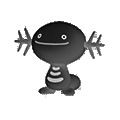


💡 Some clues about this pokemon 
Type:  ['water', 'ground'] 
Region:  johto 
Quick move:  ['water gun', 'mud shot']

The Pokemon name now looks like this:  ------

You have  5  guesses left
Type a single letter here, then press enter: ji

Please, press just one letter
The Pokemon name now looks like this: ------

You have  5  guesses left
Type a single letter here, then press enter: o
The Pokemon name now looks like this: -OO---

You have  5  guesses left
Type a single letter here, then press enter: l
There are no L's in the word
The Pokemon name now looks like this: -OO---

You have  4  guesses left
Type a single letter here, then press enter: m
There are no M's in the word
The Pokemon name now looks like this: -OO---

You have  3  guesses left
Type a single letter here, then press enter: n
There are no N's in the word
The Pokemon name now looks like this: -OO---

You have  2  guesses left
Type a single letter here, then press enter: a
There are no A's in the word
The Pokemon name no

In [6]:
!git clone https://github.com/emae1712/CodeInPlace2021.git

from PIL import Image, ImageOps
import requests
from io import BytesIO

import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io

import json
import random

def play_game(name, about, image):
    INITIAL_GUESSES = 5
    list_guesses = []
    print('\nThe Pokemon name now looks like this: ',len(name)*'-')

    while True:
        result =""
        print('\nYou have ', INITIAL_GUESSES,' guesses left')
        guess = (input('Type a single letter here, then press enter: ')).upper()

        if len(guess) != 1:
            print('\nPlease, press just one letter')
        else:
            if guess in name:
                list_guesses.append(guess)
            else:
                print('There are no '+ str(guess)+"\'s in the word")
                INITIAL_GUESSES -= 1

        for letter in name:
            if letter in list_guesses:
                result += letter   
            else:
                result += '-'
            
        #Show the progress of the game
        if result != name.upper():
            print('The Pokemon name now looks like this: '+ result)
        else:
            print('\n🥳 Congratulations, the pokemon name is:', name, '\nAbout:', about)
            image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            cv2_imshow(image_2)
            break

        #Show when you lost the game
        if INITIAL_GUESSES == 0:
            print('\nSorry, you lost. The secret word was:', name)
            break

def movements(quick_move):
    value =[]
    for i in range(len(quick_move)):
            value.append(quick_move[i]['name'])
    return value

def main():
    print('👋 Welcome to Pokemon data')
    print('There is information about 251 Pokemon from the Kanto and Johto regions. Your mission will be to guess the Pokemon shown in the image. \nGotta catch \'em all!\n')
    print('🤩 Who is that Pokemon? ')
    see_image =input("Press enter to see the image ")
    if see_image != '':
        input("Just press enter to see the image ")

    with open('/content/CodeInPlace2021/pokemon.json') as Pokemon:
        
        data = json.load(Pokemon)
        index = random.randint(0,len(data['pokemon'])-1)
        img_url=data['pokemon'][index]['img']
        image = io.imread(img_url) 
        image_2 = 255-cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        cv2_imshow(image_2)

        #Clues
        pokemon_type = data['pokemon'][index]['type']
        region = data['pokemon'][index]['generation']['name']
        quick_move = movements(data['pokemon'][index]['quick-move'])

        print('\n💡 Some clues about this pokemon', 
            "\nType: ", pokemon_type, 
            "\nRegion: ", region, 
            '\nQuick move: ', quick_move)
        
        #data about the pokemon
        name =data['pokemon'][index]['name']
        about = data['pokemon'][index]['about']
        

        #Pokemon name guessing
        play_game(name.upper(), about, image)
            

if __name__== '__main__':
    main()